cars_train#
cars_test_damagedd#
cars_test_damage#
cars_test_good#
cars_test_damageddcars_test_damage#
cars_train_cross_cars_test_damageddcars_test_damage#
train: cars_train
anomaly_merged: cars_train_cross_cars_test_damageddcars_test_damage
cross: cars_train_cross_cars_test_damageddcars_test_damage


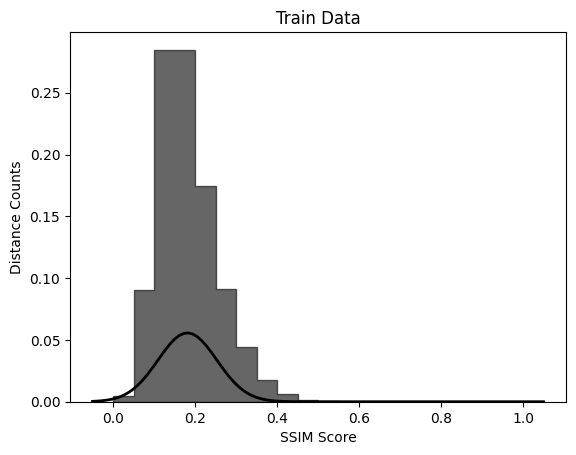

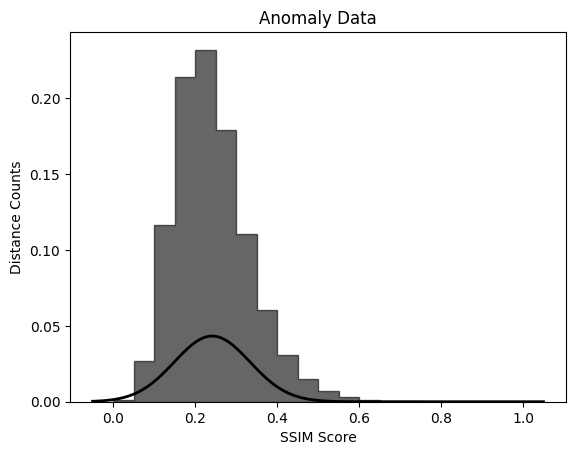

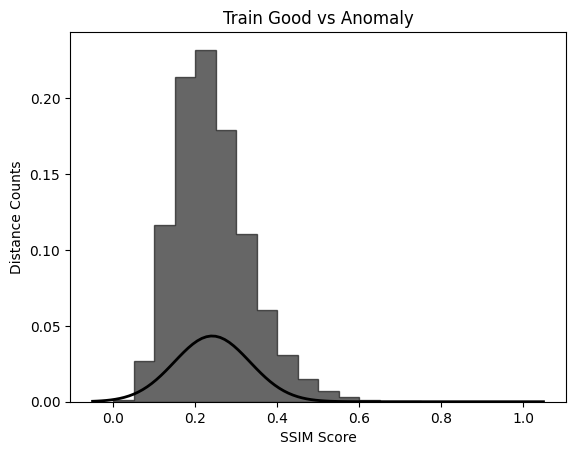

<Figure size 640x480 with 0 Axes>

In [1]:
from CalculateDistributions_ssim import CalculateImageDistribution
import matplotlib.pyplot as plt


def create_plot(obj, plot_name, title, color='k', normalize=True):
    x, p = obj.plotNormalDistribution(intersection_matrix=obj.dict_matrices[plot_name], color=color, normalize=normalize)
    plt.plot(x, p, 'k', linewidth=2)
    plt.xlabel('SSIM Score')
    plt.ylabel('Distance Counts')
    plt.title(f'{title}')
    file_name = f'{obj_name}_{title}_ssim'.replace(" ", "")
    plt.savefig(file_name)
    plt.show()
    plt.clf()

    

obj_name = 'metal_nut'
obj_name = 'screw'
obj_name = 'cable'
obj_name = 'grid'
obj_name = 'zipper'
obj_name = 'cars'


obj = CalculateImageDistribution()
#obj.load_dicts(f"ssim/{obj_name}_256_x_256.pkl")
obj.load_dicts(f"{obj_name}_256_x_256.pkl")
#for roads
#obj.load_dicts("all_256_x_256.pkl")

anomaly_merged=""
cross=""
for x in obj.dict_matrices:
  if f'{obj_name}' in x:
    print(x+'#')
    if x.count("test") >1:
        anomaly_merged = x
    if "cross" in x: 
        cross = x

train  = f'{obj_name}_train'
print('train:' ,train)

print('anomaly_merged:' ,anomaly_merged)

print('cross:' ,cross)


#####Train PLOT #######
create_plot(obj, train, 'Train Data')

#####Anomaly PLOT #######
create_plot(obj, anomaly_merged, 'Anomaly Data')

#####CROSS_DISTRBUTION PLOT #######
create_plot(obj, cross, "Train Good vs Anomaly")



